In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# Data collection

In [3]:
df=pd.read_csv("trainKNN.txt")

In [4]:
df.shape

(195, 11)

In [5]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df.columns = attributes
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df.shape

(195, 11)

In [7]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,103.384615,1.518281,13.373846,2.750103,1.456154,72.639795,0.521744,8.911538,0.165077,0.050513,2.676923
std,60.913499,0.003057,0.784929,1.390655,0.492293,0.763064,0.673624,1.425102,0.486304,0.086506,2.064234
min,2.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,50.500000,1.516455,12.875000,2.335000,1.190000,72.330000,0.145000,8.220000,0.000000,0.000000,1.000000
50%,102.000000,1.517630,13.270000,3.480000,1.360000,72.810000,0.560000,8.570000,0.000000,0.000000,2.000000
75%,153.500000,1.518950,13.795000,3.605000,1.625000,73.080000,0.610000,9.105000,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


# Data cleaning

In [8]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_Of_Glass      int64
dtype: object

In [9]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_Of_Glass    0
dtype: int64

In [10]:
df[df.duplicated()]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass


# Exploratory Data Analysis

In [11]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_Of_Glass'],
      dtype='object')

In [13]:
df=df.drop(['Id'], axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [14]:
df["Type_Of_Glass"].value_counts()

2    73
1    66
7    26
3    14
5    10
6     6
Name: Type_Of_Glass, dtype: int64

<AxesSubplot:title={'center':'Glass type percentage'}, ylabel='Type_Of_Glass'>

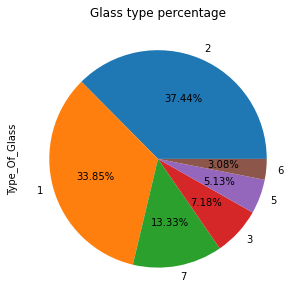

In [15]:
plt.figure(1, figsize=(5,5))
plt.title("Glass type percentage")
df['Type_Of_Glass'].value_counts().plot.pie(autopct="%0.2f%%")

In [16]:
columns= [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

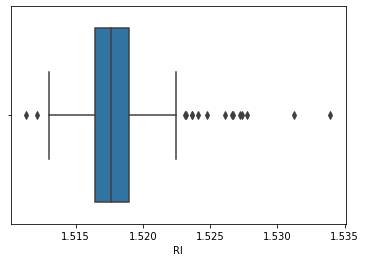

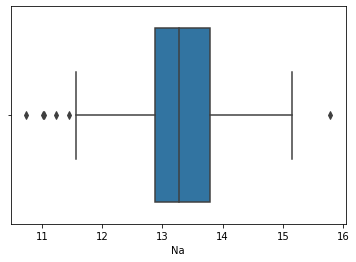

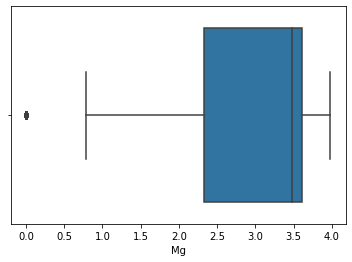

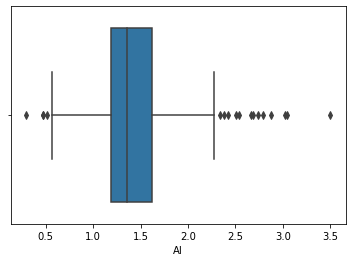

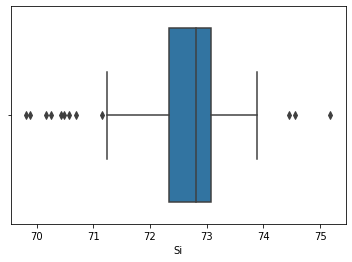

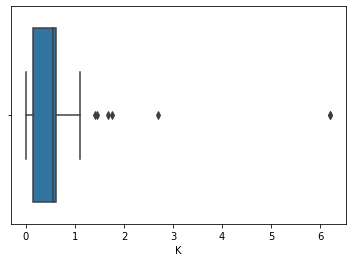

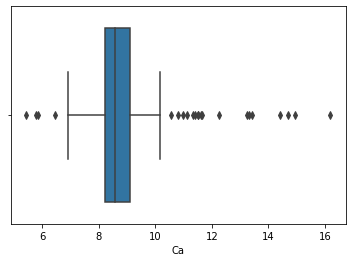

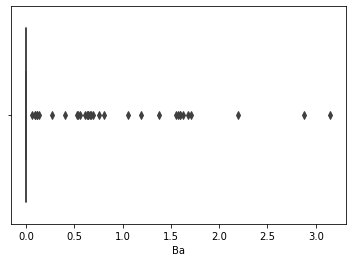

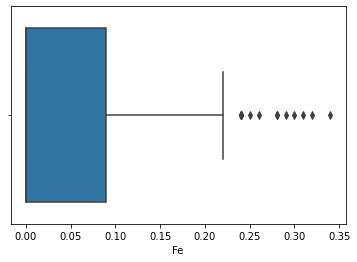

In [17]:
for i in df[columns].columns:
    sns.boxplot(df[columns][i])
    plt.xlabel(i)
    plt.show()

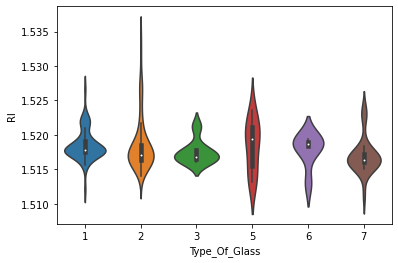

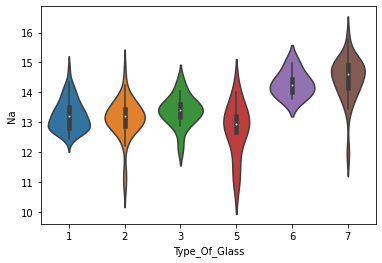

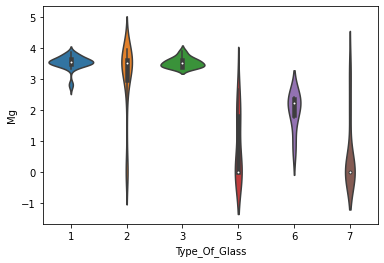

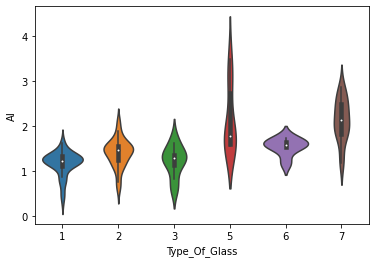

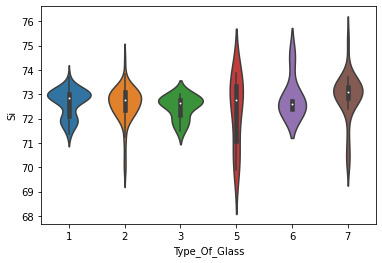

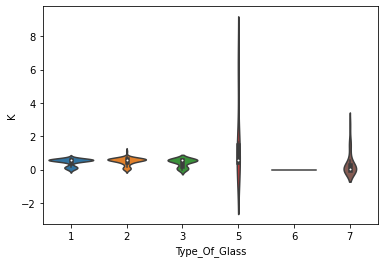

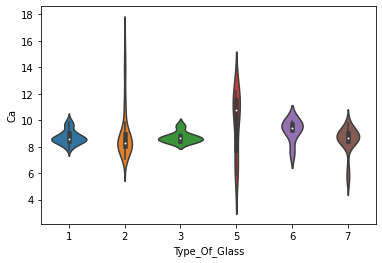

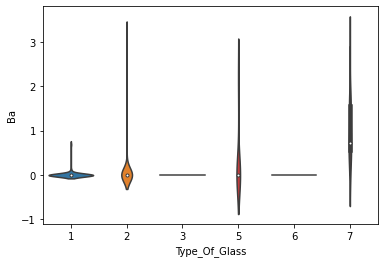

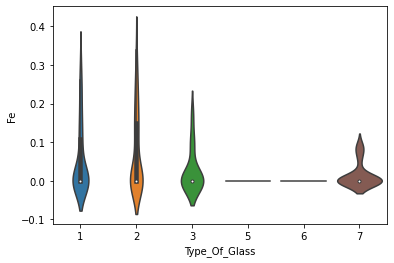

In [18]:
for i in df[columns].columns:
    sns.violinplot(x=df["Type_Of_Glass"],y=df[columns][i])
    plt.ylabel(i)
    plt.xlabel("Type_Of_Glass")
    plt.show()

<AxesSubplot:>

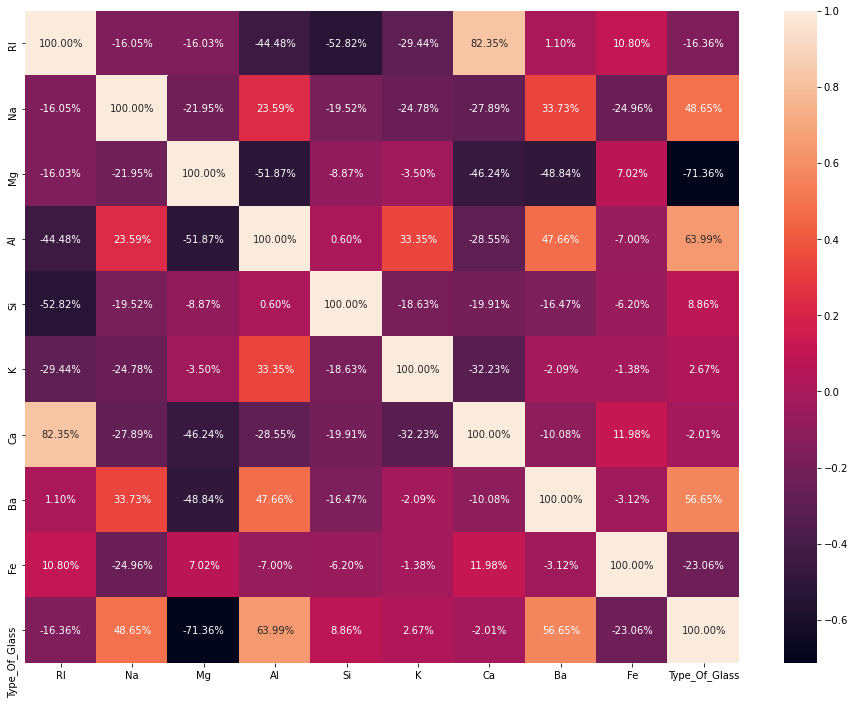

In [19]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

Better correlatin for Type_Of_Glass with Al, Ba and Na.

# Outliers and Treatment

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,195.0,1.518281,0.003057,1.51131,1.516455,1.51763,1.51895,1.53393
Na,195.0,13.373846,0.784929,10.73000,12.875000,13.27000,13.79500,15.79000
Mg,195.0,2.750103,1.390655,0.00000,2.335000,3.48000,3.60500,3.98000
Al,195.0,1.456154,0.492293,0.29000,1.190000,1.36000,1.62500,3.50000
Si,195.0,72.639795,0.763064,69.81000,72.330000,72.81000,73.08000,75.18000
K,195.0,0.521744,0.673624,0.00000,0.145000,0.56000,0.61000,6.21000
Ca,195.0,8.911538,1.425102,5.43000,8.220000,8.57000,9.10500,16.19000
Ba,195.0,0.165077,0.486304,0.00000,0.000000,0.00000,0.00000,3.15000
Fe,195.0,0.050513,0.086506,0.00000,0.000000,0.00000,0.09000,0.34000
Type_Of_Glass,195.0,2.676923,2.064234,1.00000,1.000000,2.00000,3.00000,7.00000


In [17]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column RI outliers = 8.21%
Column Na outliers = 3.08%
Column Mg outliers = 17.95%
Column Al outliers = 8.72%
Column Si outliers = 6.15%
Column K outliers = 3.59%
Column Ca outliers = 11.28%
Column Ba outliers = 100.00%
Column Fe outliers = 7.18%
Column Type_Of_Glass outliers = 16.41%


In [20]:
def floorcapping(df):
  i = input()
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
  x = pd.DataFrame(x)
  substring = 'True'
  y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
  if True in y[i].tolist():
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i])) 
  # substitute upper and lower whiskes to outliers
floorcapping(df)

Mg


In [19]:
floorcapping(df)

Na


In [21]:
floorcapping(df)

K


In [22]:
floorcapping(df)

Fe


In [23]:
floorcapping(df)

Al


In [24]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers present in the data of RI
-------------------------------
Outliers  not present in the data of in Na
-------------------------------
Outliers  not present in the data of in Mg
-------------------------------
Outliers  not present in the data of in Al
-------------------------------
Outliers present in the data of Si
-------------------------------
Outliers  not present in the data of in K
-------------------------------
Outliers present in the data of Ca
-------------------------------
Outliers present in the data of Ba
-------------------------------
Outliers  not present in the data of in Fe
-------------------------------
Outliers present in the data of Type_Of_Glass
-------------------------------


# Model building

# BY EUCLIDEAN METRIC

In [25]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [97]:
y_train = df['Type_Of_Glass']
X_train = df.iloc[:,0:9]

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)

In [138]:
knn = KNeighborsClassifier(n_neighbors=7,metric = 'euclidean') #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)*100) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=7)))

Train Accuracy :  76.41025641025641
Val Accuracy :  0.6615646258503401


In [100]:
df1=pd.read_csv("testKNN.txt")

In [101]:
attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df1.columns = attributes
df1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [102]:
df1=df1.drop(['Id'], axis=1)
df1.head()
df_final=df1

In [103]:
df1=df1.drop(['Type_Of_Glass'], axis=1)

In [104]:
y_test = df_final['Type_Of_Glass']
x_test = df1
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [132]:
y_pred = knn.predict(x_test)
print(y_pred)

[1 1 2 1 2 2 2 1 5 2 5 6 2 2 7 7 7]


In [133]:
df_final['Type_Of_Glass_pred'] = y_pred

In [134]:
df_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,2
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


In [135]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)

In [136]:
accu

0.5882352941176471

# By Manhattan metrix

In [139]:
knn = KNeighborsClassifier(n_neighbors=7,metric = 'manhattan') #it will initialise the model with @neighbours as k 
knn.fit(x_train, y_train) # train the model
print("Train Accuracy : ", knn.score(x_train,y_train)*100) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=7)))

Train Accuracy :  79.48717948717949
Val Accuracy :  0.6923658352229781


In [140]:
y_pred = knn.predict(x_test)
print(y_pred)

[1 1 2 1 2 2 2 2 5 2 5 6 6 3 7 7 7]


In [141]:
df_final['Type_Of_Glass_pred'] = y_pred

In [142]:
df_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_Of_Glass_pred
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
3,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
4,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
5,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,2
6,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,2
8,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5
9,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,2


In [143]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)

In [144]:
accu

0.6470588235294118

# Conclusions

Fitting k-NN model by without splitting training data and Clean the outliers from the features

By using Euclidean metric :- 67%
    
By using Manhattan metric :- 69%